# Momentum

**Momentum en física:** $\;$ producto de la masa de un cuerpo por su velocidad instantánea; se conserva en un sistema cerrado

**Momentum en descenso por gradiente:** $\;$ heurísticos para acelerar la convergencia en regiones llanas de la pérdida

## Momentum

**Momentum:** $\;$ acelera el movimiento en direcciones previamente buenas y lo frena en las que el gradiente ha cambiado súbitamente, como una bola pesada rodando montaña abajo; dada una constante $\beta\in[0,1)$ ($\beta=0.9$), el momentum $\boldsymbol{m}_t$ se aplica como sigue:
$$\begin{align*}
\boldsymbol{m}_{t+1}&=\beta\boldsymbol{m}_t+\boldsymbol{g}_t\\%
\boldsymbol{\theta}_{t+1}&=\boldsymbol{\theta}_t-\eta_t\boldsymbol{m}_{t+1}
\end{align*}$$

**Interpretación:** $\;$ con $\beta=0$ es descenso por gradiente; si no, es una media movil ponderada exponencialmente **(EWMA)**
$$\boldsymbol{m}_t=\beta\boldsymbol{m}_{t-1}+\boldsymbol{g}_{t-1}%
=\beta^2\boldsymbol{m}_{t-2}+\beta\boldsymbol{g}_{t-2}+\boldsymbol{g}_{t-1}%
=\cdots=\sum_{\tau=0}^{t-1}\beta^{\tau}\boldsymbol{g}_{t-\tau-1}%
\overset{\{\boldsymbol{m}_t\}=\boldsymbol{g}}{=}\boldsymbol{g}\sum_{\tau=0}^{t-1}\beta^{\tau}%
\overset{t\to\infty}{=}\frac{\boldsymbol{g}}{1-\beta}%
\overset{\beta=0.9}{=}10\,\boldsymbol{g}$$

**Incoveniente:** $\;$ oscila al final del valle por no frenar bastante

**Ejemplo (cont.):** $\;\mathbf{A}=\begin{pmatrix}20&5\\5&16\end{pmatrix}\,$ bien condicionada y 
$\;\mathbf{A}=\begin{pmatrix}20&5\\5&2\end{pmatrix}\,$ peor condicionada; $\;\boldsymbol{b}=(-14, -6)^t$, $\;c=10$

Número de condición:  30.2336


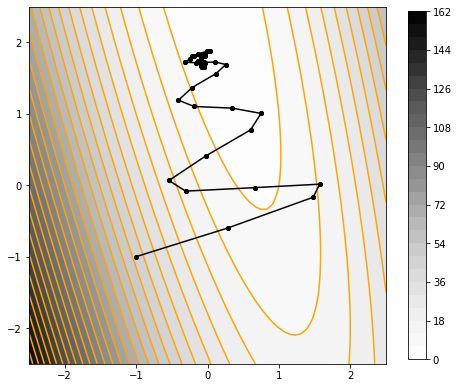

In [4]:
import numpy as np
import matplotlib.pyplot as plt
beta = 0.8 # <--- prueba otros valores
eta = 2e-2 # <--- con otros valores no converge o lo hace muy lentamente
# A, b, c = np.array([ [20, 5], [5, 16] ]), np.array([-14, -6]), 10 # <--- bien condicionada
A, b, c = np.array([ [20, 5], [5,  2] ]), np.array([-14, -6]), 10 # <--- peor condicionada
print("Número de condición: ", np.round(np.linalg.cond(A), 4))
L = lambda t: 0.5 * t.T @ A @ t + b @ t + c
theta1, theta2 = np.meshgrid(np.linspace(-2.5, 2.5, num=64), np.linspace(-2.5, 2.5, num=64))
theta = np.squeeze(np.dstack([np.ravel(theta1), np.ravel(theta2)]))
Ltheta = np.apply_along_axis(L, 1, theta)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set(aspect='equal')
ax.contour(theta1, theta2, Ltheta.reshape(theta1.shape), 30, colors='orange')
cp = ax.contourf(theta1, theta2, Ltheta.reshape(theta1.shape), 30, cmap='Greys')
plt.colorbar(cp, ax=ax, shrink=0.8)
grad = lambda t: (A + A.T) @ t + b
momentum, theta, tol, delta, t = np.zeros(2), -1.0 * np.ones(2), 0.01, np.inf, 1
while np.max(np.abs(delta)) > tol and t < 100: # <--- número máximo de iteraciones
    oldtheta = np.copy(theta)
    momentum = beta * momentum + grad(theta)
    theta = theta - eta * momentum
    t = t + 1
    plt.plot([oldtheta[0], theta[0]], [oldtheta[1], theta[1]], 'o-k', markersize=4)